<a href="https://colab.research.google.com/github/amitsiwach/Time_series_modelling/blob/main/Sales_prediction_using_fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
df=pd.read_csv('/content/drive/MyDrive/daily_sales.csv')

In [15]:
df.head()

,sales_date,sales
0,09-03-2021,298.81
1,10-03-2021,954.64
2,11-03-2021,568.19
3,12-03-2021,571.38
4,13-03-2021,1599.09


In [16]:
df.shape

(111, 2)

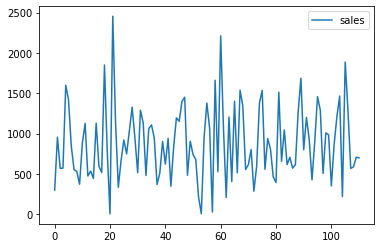

In [17]:
df.plot()

In [18]:
df.columns = ['ds','y']
df.head()

,ds,y
0,09-03-2021,298.81
1,10-03-2021,954.64
2,11-03-2021,568.19
3,12-03-2021,571.38
4,13-03-2021,1599.09


In [19]:
df['ds'] = pd.to_datetime(df['ds'],format='%d-%m-%Y')
df.head(20)

,ds,y
0,2021-03-09,298.81
1,2021-03-10,954.64
2,2021-03-11,568.19
3,2021-03-12,571.38
4,2021-03-13,1599.09
5,2021-03-14,1419.32
6,2021-03-15,847.00
7,2021-03-16,552.98
8,2021-03-17,529.05
9,2021-03-18,371.50


In [20]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [21]:
# Initialize the Model
model=Prophet()

In [22]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [24]:
future_dates=model.make_future_dataframe(periods=30)

In [25]:
future_dates.tail(10)

,ds
131,2021-07-18
132,2021-07-19
133,2021-07-20
134,2021-07-21
135,2021-07-22
136,2021-07-23
137,2021-07-24
138,2021-07-25
139,2021-07-26
140,2021-07-27


In [26]:
prediction=model.predict(future_dates)

In [27]:
prediction.head(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-03-09,797.562270,407.740045,1425.722294,797.562270,797.562270,127.869602,127.869602,127.869602,127.869602,127.869602,127.869602,0.0,0.0,0.0,925.431872
1,2021-03-10,798.883807,230.211337,1274.188531,798.883807,798.883807,-49.309670,-49.309670,-49.309670,-49.309670,-49.309670,-49.309670,0.0,0.0,0.0,749.574137
2,2021-03-11,800.205344,60.220408,1081.603088,800.205344,800.205344,-226.591124,-226.591124,-226.591124,-226.591124,-226.591124,-226.591124,0.0,0.0,0.0,573.614220
3,2021-03-12,801.526881,78.434114,1078.267176,801.526881,801.526881,-200.948213,-200.948213,-200.948213,-200.948213,-200.948213,-200.948213,0.0,0.0,0.0,600.578668
4,2021-03-13,802.848418,679.749977,1714.122286,802.848418,802.848418,384.374242,384.374242,384.374242,384.374242,384.374242,384.374242,0.0,0.0,0.0,1187.222660
5,2021-03-14,804.169955,462.045367,1493.912680,804.169955,804.169955,161.304563,161.304563,161.304563,161.304563,161.304563,161.304563,0.0,0.0,0.0,965.474518
6,2021-03-15,805.491492,101.199738,1128.112764,805.491492,805.491492,-196.699399,-196.699399,-196.699399,-196.699399,-196.699399,-196.699399,0.0,0.0,0.0,608.792093
7,2021-03-16,806.813029,396.695717,1509.294994,806.813029,806.813029,127.869602,127.869602,127.869602,127.869602,127.869602,127.869602,0.0,0.0,0.0,934.682631
8,2021-03-17,808.134565,219.950157,1285.659406,808.134565,808.134565,-49.309670,-49.309670,-49.309670,-49.309670,-49.309670,-49.309670,0.0,0.0,0.0,758.824895
9,2021-03-18,809.456102,52.804131,1117.676740,809.456102,809.456102,-226.591124,-226.591124,-226.591124,-226.591124,-226.591124,-226.591124,0.0,0.0,0.0,582.864978


In [28]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [29]:
prediction[['ds','yhat']].tail(30)

,ds,yhat
111,2021-06-28,747.549987
112,2021-06-29,1073.440466
113,2021-06-30,897.582673
114,2021-07-01,721.622698
115,2021-07-02,748.587087
116,2021-07-03,1335.231020
117,2021-07-04,1113.482820
118,2021-07-05,756.800336
119,2021-07-06,1082.690816
120,2021-07-07,906.833023


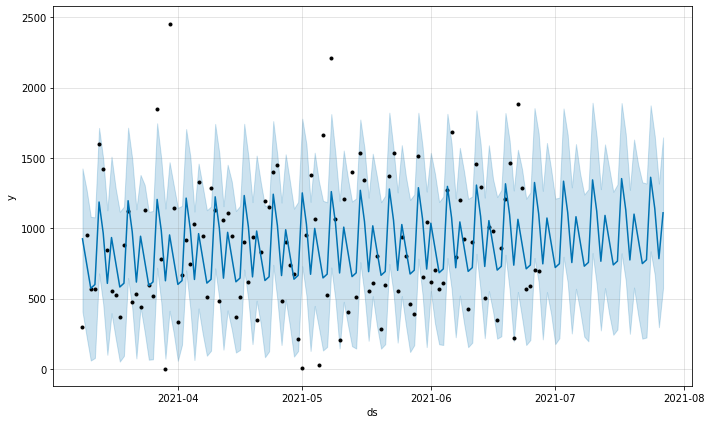

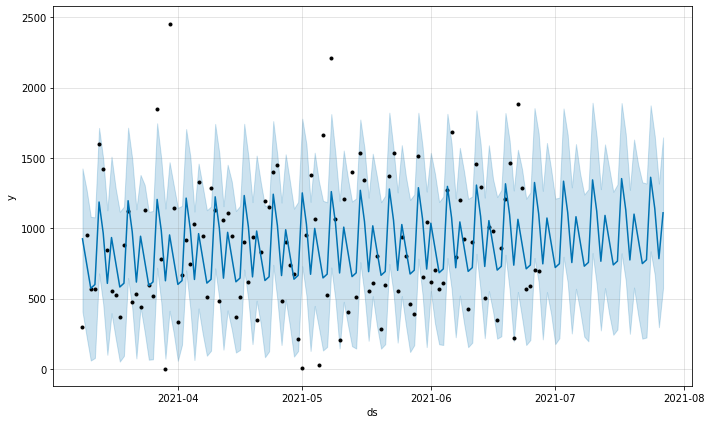

In [30]:
model.plot(prediction)

In [31]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='71 days', period='15 days', horizon = '30 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-05-28 00:00:00 and 2021-05-28 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-05-29,1306.962416,767.141410,1825.510635,1513.86,2021-05-28
1,2021-05-30,1018.200149,469.990974,1547.807488,656.99,2021-05-28
2,2021-05-31,721.743366,166.599522,1241.425695,1046.00,2021-05-28
3,2021-06-01,971.447811,425.816745,1547.168971,615.48,2021-05-28
4,2021-06-02,804.964203,308.235260,1365.195185,705.71,2021-05-28


In [32]:
df_cv[['ds','yhat','y']].head(30)

,ds,yhat,y
0,2021-05-29,1306.962416,1513.86
1,2021-05-30,1018.200149,656.99
2,2021-05-31,721.743366,1046.00
3,2021-06-01,971.447811,615.48
4,2021-06-02,804.964203,705.71
5,2021-06-03,736.167171,571.47
6,2021-06-04,685.707199,613.05
7,2021-06-05,1312.093992,1270.56
8,2021-06-06,1023.331725,1685.61
9,2021-06-07,726.874942,799.30


In [33]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,92807.248855,304.642822,297.454789,0.332154,0.309997,1.0
1,4 days,120776.072969,347.528521,347.144865,0.479383,0.549796,1.0
2,5 days,80568.948034,283.846698,259.826216,0.343000,0.309997,1.0
3,6 days,54563.212562,233.587698,206.639729,0.335734,0.288199,1.0
4,7 days,14085.207876,118.681118,112.202858,0.182454,0.140644,1.0
